In [ ]:
"""
Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.
"""

In [30]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import load_boston

In [31]:
import statsmodels.api as sm
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
from matplotlib import rcParams

In [32]:
boston=load_boston()

In [33]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [34]:
print(boston.data.shape)

(506, 13)


In [35]:
print(boston.target.shape)

(506,)


In [36]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [37]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [38]:
bos=pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
# We will insert columns names instead of just 0,1,2,3 ...as column headers.
bos.columns=boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [40]:
bos['Price']=boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


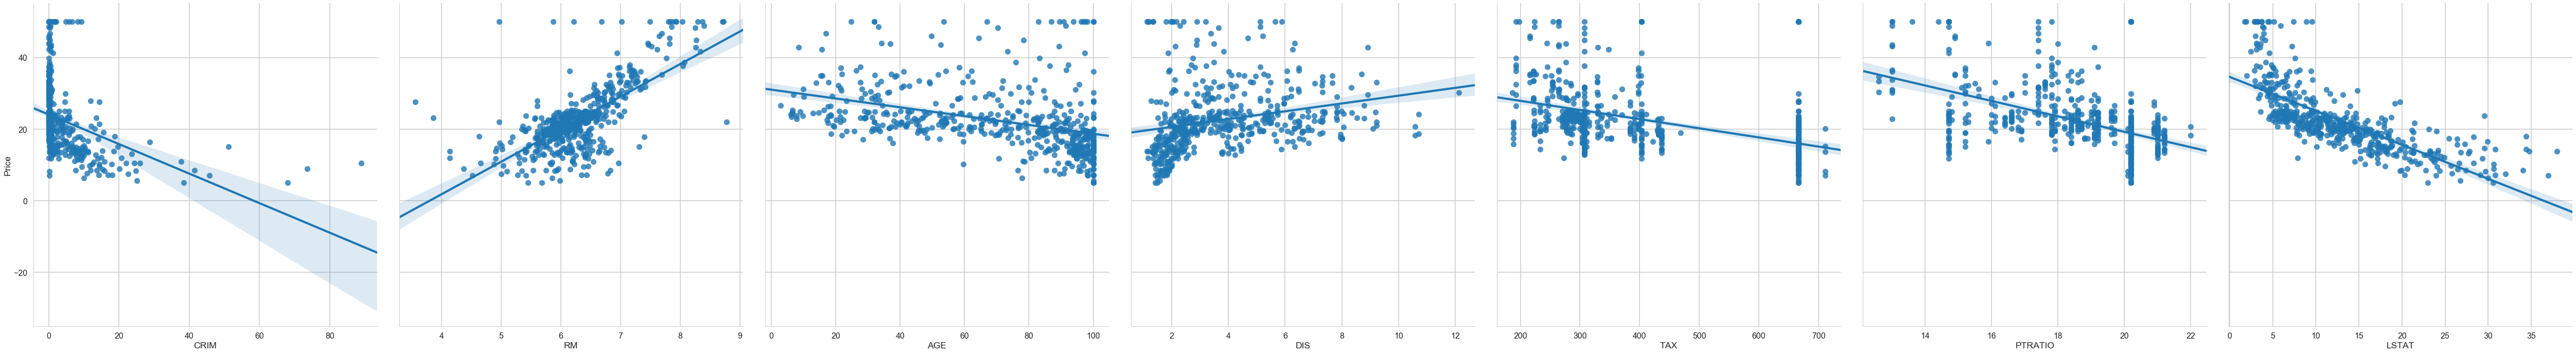

In [66]:
# plot few features and price graphs
sns.pairplot(bos, x_vars=['CRIM', 'RM' ,'AGE', 'DIS', 'TAX', 'PTRATIO' ,'LSTAT'], y_vars='Price', size=10, aspect=1, kind='reg')

In [41]:
# drop Price as it is the response/target variable, rest all are features/ predictors
X=bos.drop('Price',axis=1)
y=bos.Price

In [44]:
# we use 70% dataset to train.
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [46]:
# here we import,instantiate and fit the model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
# print the intercept and coefficients
#y=mx+c
print(lm.intercept_)
print(lm.coef_)

34.31372736850612
[-1.53299760e-01  6.50024352e-02 -2.37344401e-02  1.62517887e+00
 -1.53650863e+01  3.34261538e+00  1.14558280e-02 -1.54916081e+00
  3.02438006e-01 -1.22206795e-02 -8.12944637e-01  1.30839654e-02
 -5.46016123e-01]


In [68]:
# pair the feature names with the coefficients
list(zip(X, lm.coef_))

[('CRIM', -0.15329976026179704),
 ('ZN', 0.06500243523289286),
 ('INDUS', -0.02373444010597399),
 ('CHAS', 1.6251788749048737),
 ('NOX', -15.365086309109225),
 ('RM', 3.342615383071892),
 ('AGE', 0.011455828033990922),
 ('DIS', -1.5491608071288991),
 ('RAD', 0.30243800579518054),
 ('TAX', -0.01222067950363126),
 ('PTRATIO', -0.8129446373517901),
 ('B', 0.013083965396564423),
 ('LSTAT', -0.546016123401774)]

In [71]:
# Testing the model
y_pred=lm.predict(X_test)

z=9
for tpl in zip(y_pred[:z],y_test[:z]):
    print(tpl)

(31.42268019305231, 28.4)
(31.970016005646528, 31.1)
(30.945931270444984, 23.5)
(22.335597978244706, 26.6)
(18.835421832247366, 19.6)
(16.158302950342968, 14.3)
(35.93998312147653, 50.0)
(14.745256482075966, 14.3)
(25.08293677137522, 20.7)


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

#mse= mean_squared_error
mse= mean_squared_error(y_test, y_pred)

print(mse)

# R Squared error
r2_score(y_test, y_pred)

29.357979645157595


0.6993041391711792

In [ ]:
#R squared error is approx 70% which means that 70% of the variance of the response/target is explained by selected features.